In [1]:
import numpy as np
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import *
from scipy.io import wavfile
from scipy import signal
%matplotlib inline

sns.set_context("paper")

//anaconda/lib/python2.7/site-packages/librosa-0.4.1-py2.7.egg/librosa/core/audio.py:37: UserWarning: Could not import scikits.samplerate. Falling back to scipy.signal


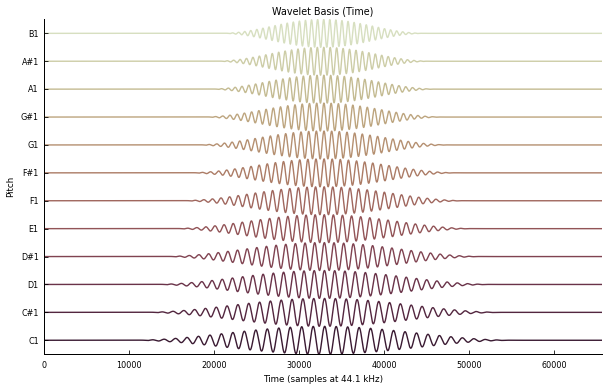

In [117]:
basis, lengths = librosa.filters.constant_q(44100,n_bins=96,bins_per_octave=12)
plt.figure(figsize=(10, 6))
# set color palette
sns.set_palette(sns.cubehelix_palette(12, start=.3, rot=.5, reverse=True))
notes = librosa.midi_to_note(np.arange(24, 24 + len(basis)))
for i, (f, n) in enumerate(zip(basis, notes)[:12]):
    f_scale = librosa.util.normalize(f) / 2
    plt.plot(i + f_scale.real)
    # plt.plot(i + f_scale.imag, linestyle=':')
plt.axis('tight')
plt.yticks(range(len(notes[:12])), notes[:12])
plt.ylabel('Pitch')
plt.title('Wavelet Basis (Time)')
plt.xlabel('Time (samples at 44.1 kHz)')
# figure aesthetics
sns.despine()
plt.savefig('wavelets_time.eps', format='eps', dpi=1200)

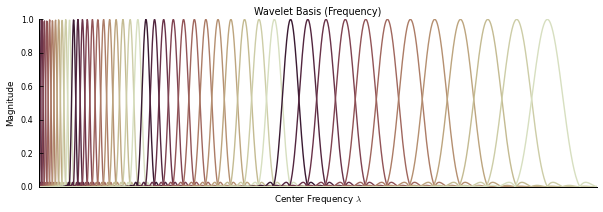

In [118]:
F = np.abs(np.fft.fftn(basis, axes=[-1]))
F = F[:, :(1 + F.shape[1] // 2)]
plt.figure(figsize=(10, 3))
idx = np.arange(12, 12 + 4*12)
for i in idx:
    plt.plot(F[i])
plt.xlim(100,1600)
# remove xticks - they are not important
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.ylabel('Magnitude')
plt.title('Wavelet Basis (Frequency)')
plt.xlabel('Center Frequency $\lambda$')
# figure aesthetics
sns.despine()
plt.savefig('wavelets_freq.eps', format='eps', dpi=1200)
#librosa.cqt_frequencies(24, fmin=librosa.note_to_hz('C3'),bins_per_octave=12)

(0, 1000)

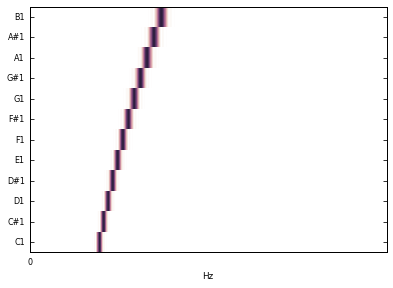

In [106]:
librosa.display.specshow(F[24:36],x_axis='linear',n_xticks=12)
notes = librosa.midi_to_note(np.arange(24, 24 + len(basis)))
plt.yticks(range(len(notes[:12])), notes[:12])
plt.xlim(0,1000)

In [34]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
filename = 'Amin7.wav'
y, sr = librosa.load(filename)

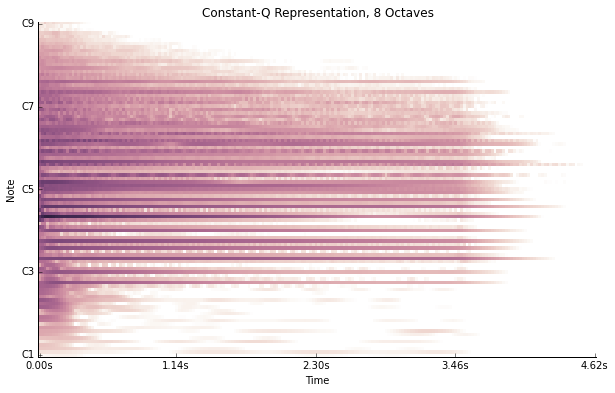

In [41]:
C = librosa.cqt(y, sr=sr,n_bins=97,bins_per_octave=12)
C = C[:,0:200]
plt.figure(figsize=(10, 6))
# set color palette
sns.set_palette(sns.cubehelix_palette(12, start=.3, rot=.5, reverse=True))
librosa.display.specshow(librosa.core.logamplitude(C**2, ref_power=np.max), sr=sr, x_axis='time', y_axis='cqt_note')
sns.despine()
plt.title('Constant-Q Representation, 8 Octaves')
plt.savefig('cqt.pdf', format='pdf', dpi=200)

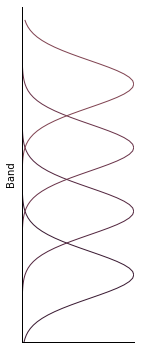

In [42]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

from scipy import ndimage
r = np.arange(1,96)
plt.figure(figsize=(2, 6))
band = 4
centers = []
centers.append(len(r)/5)
centers.append(2*len(r)/5)
centers.append(3*len(r)/5)
centers.append(4*len(r)/5)
mid = len(r)/2;
offset = 48 - mid;
sig = 15/((band+1)/2);
for b in np.arange(0,4):
    c = centers[b] + offset 
    x = gaussian(np.arange(0,97),c,sig)
    z = np.arange(0,97)
    plt.plot(x,z)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.ylabel('Band')
sns.despine()
plt.savefig('bands.pdf', format='pdf', dpi=100)

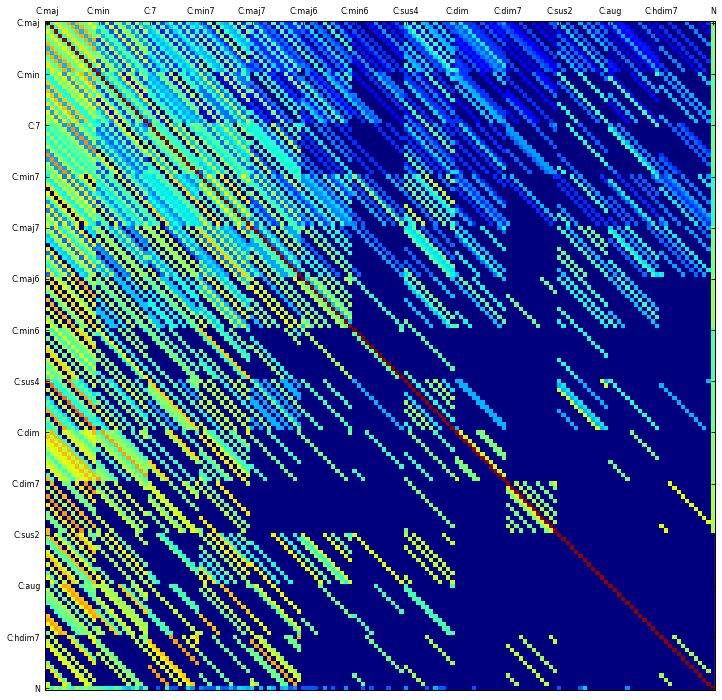

In [90]:
import scipy.io as sio

matfile = sio.loadmat('transmat.mat')
transmat = matfile['transmat']
chords = matfile['chords']
i = np.arange(157)
chordList = []
for idx in np.arange(157):
        chordList.append(chords[0,idx][0].encode('ascii'))
root_chords = np.arange(0,157,12)
c_chords = []
for idx in root_chords:
    c_chords.append(chordList[idx])
figure(1)
plt.figure(figsize=(12,12))
plt.imshow(np.log(transmat),interpolation='none')
plt.xticks(root_chords)
plt.yticks(root_chords)
ax = plt.gca()
ax.set_xticklabels(c_chords)
ax.set_yticklabels(c_chords)
ax.xaxis.set_ticks_position('top') # the rest is the same
plt.savefig('transmat.svg', format='svg', dpi=3000)
plt.show()

(array([  463,     0,     6,     0,     0,    12,     0, 27223]),
 array([ 1.   ,  1.375,  1.75 ,  2.125,  2.5  ,  2.875,  3.25 ,  3.625,  4.   ]))

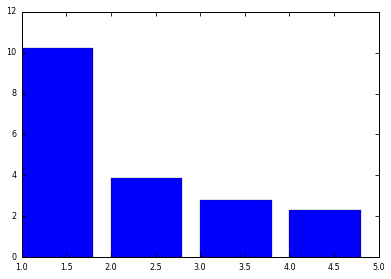

In [3]:
import scipy.io as sio

matfile = sio.loadmat('max_voters/haarWavelet-4-voters.mat')
wavelet4 = matfile['maxVoter']
w4hist = np.histogram(wavelet4,bins=4)
hist
matfile = sio.loadmat('max_voters/haarScattering-4-voters.mat')
scattering4 = matfile['maxVoter']
s4hist = np.histogram(scattering4,bins=4)
s4hist[0]
voters = np.arange(1,5)
plt.bar(voters,log(s4hist[0]))

matfile = sio.loadmat('max_voters/haarWavelet-4-voters.mat')
wavelet8 = matfile['maxVoter']
w8hist = np.histogram(wavelet8,bins=8)
w8hist

In [18]:
import scipy.io as sio

matfile = sio.loadmat('max_voters/haarWavelet-4-voters.mat')
wavelet4 = matfile['maxVoter']
w4hist = np.histogram(wavelet4,bins=4)
w4hist
matfile = sio.loadmat('max_voters/haarScattering-4-voters.mat')
scattering4 = matfile['maxVoter']
s4hist = np.histogram(scattering4,bins=4)
s4hist

matfile = sio.loadmat('max_voters/multiband-4-voters.mat')
multiband4 = matfile['maxVoter']
m4hist = np.histogram(multiband4,bins=4)
N = np.sum(m4hist[0])
m4histN = np.divide(m4hist[0],float(N))
m4histN

array([ 0.79551689,  0.14766821,  0.01447444,  0.04234046])

In [19]:
N = np.sum(w4hist[0])
w4histN = np.divide(w4hist[0],float(N))
w4histN

array([  1.67123881e-02,   2.16575224e-04,   4.33150448e-04,
         9.82637886e-01])

In [20]:
N = np.sum(s4hist[0])
s4histN = np.divide(s4hist[0],float(N))
s4histN

array([  9.97292810e-01,   1.76869766e-03,   5.77533930e-04,
         3.60958706e-04])